# <font color = "Indigo"><h3 align = "center">PROJECT </h3></font>

# Analyzing and Predicting the purchases done on the day of Black Friday !


## Importing the nescessary library files 
* <b>pandas</b> for data manipulation and analysis i.e, for reading the file.
* <b>numpy</b> for numerical functions.
* <b>matplot</b> for graphs and plotting.
* <b>seaborn</b> for graphs and plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

## Reading the file using pandas

In [2]:
product = pd.read_csv('BlackFriday.csv')

In [3]:
product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Looking at the data, we can conclude that our set possesses 12 different parameters: 7 numerical (integer and float) and 5 object variables. Furthermore, the dataset contains two short type variables: Product_Category_2 and Product_Category_3. We will see later how to handle this problem.

## To check the number of empty/NaN variables

In [5]:
product.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Comparision 1: Which gender customer is high? 
* Using seaborn library, we can find out the required information

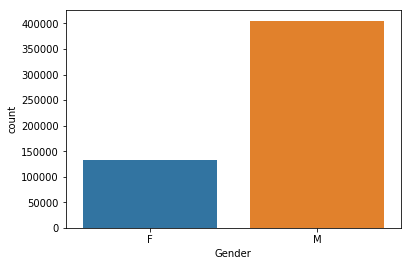

In [6]:
sns.countplot(product['Gender'])

The graph shows that there are almost 3 times more male customers than female customers!

## Comparision 2: Distribution of gender variable, but taking into consideration the Age category. 
Once again countplot function will be used, but now with defined hue parameter.

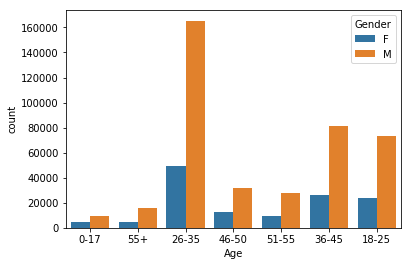

In [7]:
sns.countplot(product['Age'], hue=product['Gender'])

* From the figure above, we can easily conclude that the highest number of customers belong to the age group between 26 and 35, for both genders. 
* Younger and older population are far less represented on Black Friday. 
* Based on these results, the retail store should sell most of the products that target people in their late twenties to early thirties. 
* To increase profits, the number of products targeting people around their thirties can be increased while the number of products that target the older or younger population can be reduced.

## To analyse the model in terms of mean values, min and max value, standard deviation, we use the describe function:
The describe() function computes a summary of statistics pertaining to the DataFrame columns.

In [8]:
product.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


## Analysis of the product bought and sold:

Pandas Index.nunique() function return number of unique elements in the object. It returns a scalar value which is the count of all the unique values in the Index. By default the NaN values are not included in the count. If dropna parameter is set to be False then it includes NaN value in the count.

In [9]:
product['User_ID'].nunique()

5891

From the above code we can conclude that during Black Friday, 5,891 different customers have bought something from the store.

In [10]:
product['Product_ID'].nunique()

3623

From the above code we can conclude that during Black Friday, 3,623 different products are sold.

## Occupation of the customers:

numpy.unique() function:
The unique() function is used to find the unique elements of an array.Returns the sorted unique elements of an array.

In [11]:
def unique(column):
    x = np.array(column)
    print(np.unique(x))

In [12]:
print("The unique ID numbers of customers occupations:")
unique(product['Occupation'])

The unique ID numbers of customers occupations:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


There are 21 different occupation ID's registered during the black Friday.
To see how much money each costumer group (grouped by occupation ID) spent, we can use a for loop and sum the spent money for each individual occupation ID:

In [13]:
occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(product[product['Occupation'] == oid]['Purchase'].sum())

spent_money

[625814811,
 414552829,
 233275393,
 160428450,
 657530393,
 112525355,
 185065697,
 549282744,
 14594599,
 53619309,
 114273954,
 105437359,
 300672105,
 71135744,
 255594745,
 116540026,
 234442330,
 387240355,
 60249706,
 73115489,
 292276985]

## Graphical representation of the money spent is shown in the following way:

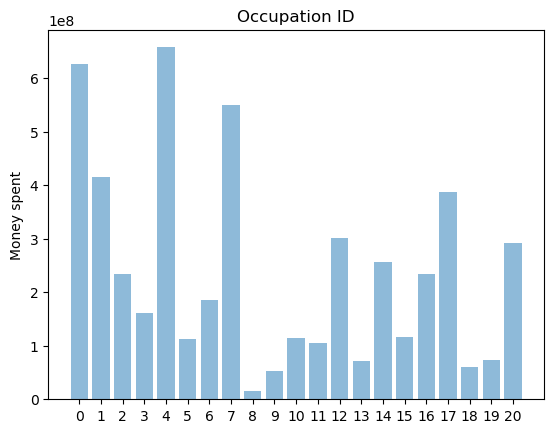

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()

### Conclusion:
The group of people with occupation category 4 spent the highest amount of money whereas the the group 8 has spent the least amount of money.

## Comparison based on City of the customers:

In [15]:
product['City_Category'].nunique()

3

We can show a bar chart or pie chart to find out from where more number of customers are coming.

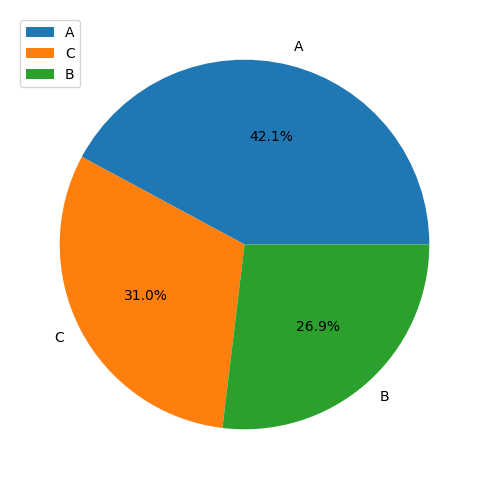

In [16]:
explode = (0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(product['City_Category'].value_counts(), explode=explode, labels=product['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()


# Data Preprocessing for ML Algorithms

Earlier, we had found out that  Product_Category_2 and Product_Category_3 are short type variables and has lot of null values. These null values must be removed or else it can ruin our machine learning model. We have only 30% of data inside Product_Category_3, so it is safe to drop this column:


In [17]:
product = product.drop(['Product_Category_3'], axis=1)

We will fill the missing data in Product_Category_2 by mean value of the existing data.

In [18]:
product['Product_Category_2'].fillna((product['Product_Category_2'].mean()), inplace=True)

In [20]:
product.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

### To analyze and predict the products purchased, we do not need few columns such as User_ID and Product_ID, so we remove them:

In [21]:
product = product.drop(['User_ID','Product_ID'], axis=1)
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 36.9+ MB


### Machine learning models are capable of processing numerical values. Therefore, we need to convert the categorical columns to numeric ones. We do it by using the get_dummies python function:
pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

The following script creates one-hot encoded vectors for Gender, Age, City, and Stay_In_Current_City_Years column.

In [25]:
df_Gender = pd.get_dummies(product['Gender'])
df_Age = pd.get_dummies(product['Age'])
df_City_Category = pd.get_dummies(product['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(product['Stay_In_Current_City_Years'])

data_final = pd.concat([product, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.842144,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.000000,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.842144,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.000000,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.842144,7969,0,...,0,1,0,0,1,0,0,0,0,1


# Predicting the Amount Spent
## Using Linear Regression model

In [26]:
X = data_final[['Occupation', 'Marital_Status', 'Product_Category_2', 'F', 'M', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C', '0', '1', '2', '3', '4+']]
y = data_final['Purchase']

Now, we will import the train_test_split function to divide all our data into two sets: training and testing set. The training set will be used to fit our model. Training data is always used for learning, adjusting parameters of a model and minimizing an error on the output. The rest of the data (the Test set) will be used to evaluate performances.

The script below splits our dataset into 60% training set and 40% test set:

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.fit(X_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


We can now print the intercept parameter value and values of all coefficients of our model, after the learning procedure:

In [29]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 11168.705468626566
                    Coefficient
Occupation             9.267236
Marital_Status       -73.783568
Product_Category_2  -212.198727
F                   -320.019284
M                    320.019284
0-17                -517.187383
18-25               -111.006726
26-35                 81.716102
36-45                104.024864
46-50                 17.951946
51-55                347.617402
55+                   76.883796
A                   -361.679364
B                   -131.358029
C                    493.037393
0                    -45.447057
1                     -3.251060
2                     18.215227
3                     24.191875
4+                     6.291015


As you can see, each category of our data set is now defined with one regression coefficient. The training process was looking for the best values of these coefficients during the learning phase. The values presented in the output above are the most optimum values for the coefficients of our machine learning model.

## Now we look at the predictions using the test data inputs:

In [30]:
predictions = lm.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [10301.70103526  8155.27448589 11507.61878447 ...  9478.8797943
  9115.9348073   8646.92661609]


# Performance Estimation of ML model

We are going to estimate the results by finding the mean absolute error and mean squared error of our predictions.
### To find these values, we can use methods from the metrics class from sklearn library.

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3872.853159711746
MSE: 23767850.642020278
